# Projeto etapas do processamento do Big Data

o objetivo é realizar um agrupamento de pessoas de acordo com o grupo de risco que se encontra baseado no peso e no colesterol.

Para isso, vamos seguir as etapas do processamento do Big Data

1. Coleta de dados 
2. Preparação dos dados
3. Análise de dados 
4. Modo analítico 
5. Visualização



# Coleta dos dados 
Nesta etapa, são definidas as fontes a serem utilizadas para gerar armazenamento, podendo ser bancos de dados SQL, NoSQL, Frameworks e muitas outras fontes. 

Para esse exercício vamos coletar dados já estruturados de dois arquivos. Um arquivo Excel no formato xlxs e outro no formato csv. 

# Coletando dados de estados brasileiros

In [2]:
import pandas as pd # biblioteca de leitura e tratamento de dataframes

# lendo arquivo 
estados = pd.read_csv( 'estados_brasileiros.csv', sep = ';', encoding='latin-1')


In [3]:
estados.head()

,id_estado,estado,sigla_estado,pais
0,1,Acre,ac,Brasil
1,2,Alagoas,al,NaN
2,3,Amapá,ap,Brasil
3,4,Amazonas,am,NaN
4,5,Bahia,ba,Brasil


# Coletando dados de clientes

In [19]:
clientes = pd.read_excel('amostra_dados_clientes.xlsx')
clientes.head()

,id_cliente,peso,colesterol,genero,id_estado
0,1,102.0,111,Masculino,23
1,2,115.0,135,Masculino,7
2,3,115.0,136,Masculino,4
3,4,140.0,167,Feminino,24
4,5,130.0,158,Masculino,26


# Coletando dados das idades dos clientes

In [5]:
idade = pd.read_csv('idade_clientes.csv', sep = ';', encoding='latin-1')
idade.head()

,id_cliente,idade
0,1,17
1,2,28
2,3,62
3,4,55
4,5,44


#Preparação dos dados 
É a etapa minuciosa onde os dados são "limpos" e se tornam aptos para a análise. Essa etapa tem o objetivo de reduzir discrepâncias, evitar valores nulos, indicar as anomalias e preencher lacunas. Essas informações, se não tratadas, acabam prejudicando o processo como um todo, já que a análise poderá ser comprometida caso os dados não sejam verdadeiros.

# Analisando as variáveis da base de dados

In [6]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_cliente  225 non-null    int64  
 1   peso        222 non-null    float64
 2   colesterol  225 non-null    int64  
 3   genero      225 non-null    object 
 4   id_estado   225 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 8.9+ KB


In [18]:
clientes.describe()

,id_cliente,peso,colesterol,id_estado
count,222.000000,222.000000,222.000000,222.000000
mean,113.792793,142.315315,168.612613,13.653153
std,65.113700,31.198817,39.654999,7.580128
min,1.000000,95.000000,102.000000,1.000000
25%,58.250000,115.000000,135.000000,7.000000
50%,114.500000,138.500000,167.500000,13.500000
75%,169.750000,170.000000,206.250000,20.000000
max,225.000000,203.000000,235.000000,27.000000


In [8]:
estados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id_estado     27 non-null     int64 
 1   estado        27 non-null     object
 2   sigla_estado  27 non-null     object
 3   pais          22 non-null     object
dtypes: int64(1), object(3)
memory usage: 992.0+ bytes


In [9]:
idade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   id_cliente  547 non-null    int64
 1   idade       547 non-null    int64
dtypes: int64(2)
memory usage: 8.7 KB


In [10]:
idade.describe()

,id_cliente,idade
count,547.00000,547.000000
mean,274.00000,42.791590
std,158.04957,15.160209
min,1.00000,16.000000
25%,137.50000,30.000000
50%,274.00000,42.000000
75%,410.50000,55.000000
max,547.00000,70.000000


#Analisando dados ausentes

In [11]:
# Verificando valores ausentes/nulos na base
estados.isna().sum()

id_estado       0
estado          0
sigla_estado    0
pais            5
dtype: int64

In [12]:
clientes.isna().sum()

id_cliente    0
peso          3
colesterol    0
genero        0
id_estado     0
dtype: int64

In [13]:
idade.isna().sum()

id_cliente    0
idade         0
dtype: int64

In [14]:
# Verificando os registros com valores nulos
clientes.loc[clientes['peso'].isnull()]

,id_cliente,peso,colesterol,genero,id_estado
32,33,NaN,188,Masculino,22
41,42,NaN,177,Masculino,20
87,88,NaN,168,Feminino,12


Identicamos 3 valores ausentes na base de dados de clientes.
Para esse caso, temos 3 opções para tratamento de dados númericos. 

1. Eliminação dos registros
2. Média dos pesos dos clientes: Realiza a média dos pesos OBS: A média é fortemente influenciada pela presença de valores extremos;
3. Médiana dos pesos dos clientes. Realiza a mediana dos pesos . (medida que pega o valor cetral dos dados) 





# Eliminando dados ausentes

In [15]:
#Dados Ausentes
clientes.dropna(subset=['peso'], inplace=True) # para eliminar o registro. Inplace = True siginifica que quer alterar os dados naquele dataframe

In [16]:
clientes.isna().sum()

id_cliente    0
peso          0
colesterol    0
genero        0
id_estado     0
dtype: int64

In [17]:
clientes.count()

id_cliente    222
peso          222
colesterol    222
genero        222
id_estado     222
dtype: int64

Alterando os dados por outras medidas (recarrega a base de clientes)


In [20]:
clientes.describe()

,id_cliente,peso,colesterol,id_estado
count,225.000000,222.000000,225.000000,225.000000
mean,113.000000,142.315315,168.733333,13.711111
std,65.096083,31.198817,39.413671,7.562307
min,1.000000,95.000000,102.000000,1.000000
25%,57.000000,115.000000,135.000000,7.000000
50%,113.000000,138.500000,168.000000,14.000000
75%,169.000000,170.000000,204.000000,20.000000
max,225.000000,203.000000,235.000000,27.000000


In [21]:
# Realizando a média e mediana da variável peso
media = clientes.peso.mean()
mediana = clientes.peso.median()

In [22]:
# verificando valores
print(f"O valor da média dos pesos é:{media}\nO valor da mediana é {mediana}")


O valor da média dos pesos é:142.3153153153153
O valor da mediana é 138.5


In [23]:
# Fazendo arrendondamento da variável média
round(media,2)

142.32

In [24]:
# preencher valores ausentes pela média
clientes.peso.fillna(round(media,2), inplace=True)

In [25]:
# Verifica se existe algum valor ausente
clientes.isna().sum()

id_cliente    0
peso          0
colesterol    0
genero        0
id_estado     0
dtype: int64

In [26]:
clientes.count()

id_cliente    225
peso          225
colesterol    225
genero        225
id_estado     225
dtype: int64

# Substituindo variável categórica

Quando temos uma variável do tipo categórica, uma abordagem é substituir o valor ausente pela variável mais frequente encontrada no conjunto de dados.

In [27]:
print(estados.pais.value_counts())

Brasil    22
Name: pais, dtype: int64


In [28]:
estados.pais.fillna('Brasil', inplace=True)

In [29]:
estados.isna().sum()

id_estado       0
estado          0
sigla_estado    0
pais            0
dtype: int64

# Analisando distribuição dos dados


In [30]:
import matplotlib.pyplot as plt


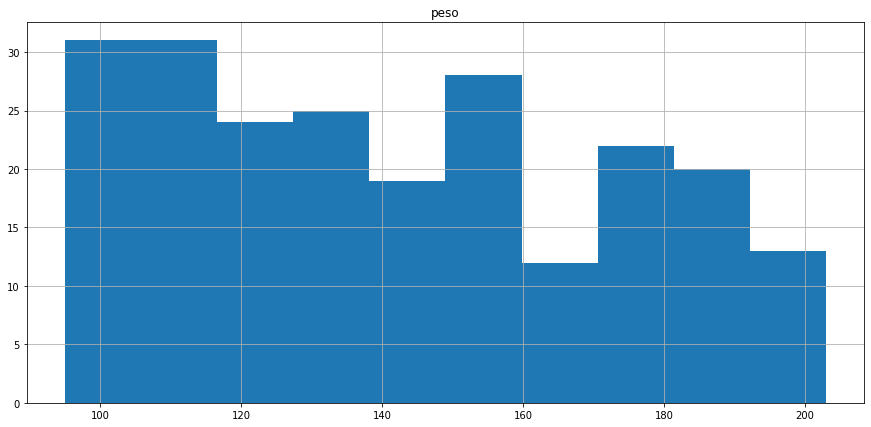

In [31]:
clientes.hist(column='peso', figsize=(15,7))
plt.show()

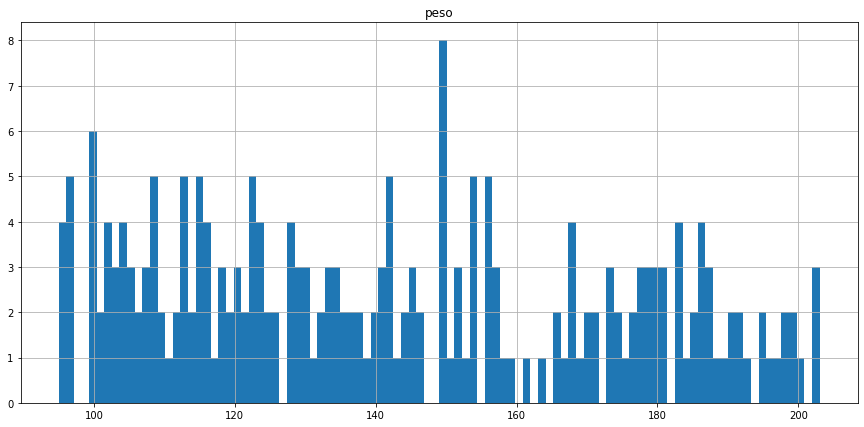

In [32]:
clientes.hist(column='peso', figsize=(15,7), bins=100)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9b431ab8d0>]],
      dtype=object)

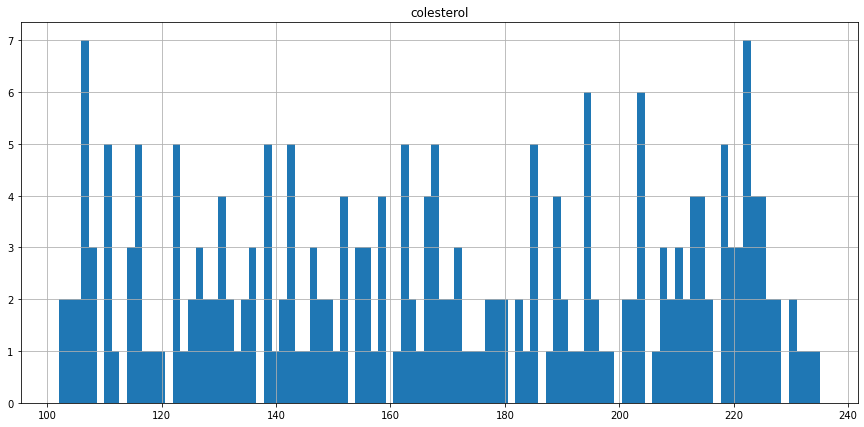

In [33]:
clientes.hist(column='colesterol', figsize=(15,7), bins=100)

In [34]:
#Criando um Identificador para a variável genero
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
clientes['genero_number'] = LE.fit_transform(clientes['genero'])

In [35]:
clientes

,id_cliente,peso,colesterol,genero,id_estado,genero_number
0,1,102.0,111,Masculino,23,1
1,2,115.0,135,Masculino,7,1
2,3,115.0,136,Masculino,4,1
3,4,140.0,167,Feminino,24,0
4,5,130.0,158,Masculino,26,1
...,...,...,...,...,...,...
220,221,180.0,219,Masculino,20,1
221,222,116.0,138,Feminino,15,0
222,223,144.0,169,Feminino,18,0
223,224,102.0,116,Masculino,6,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9b37109810>]],
      dtype=object)

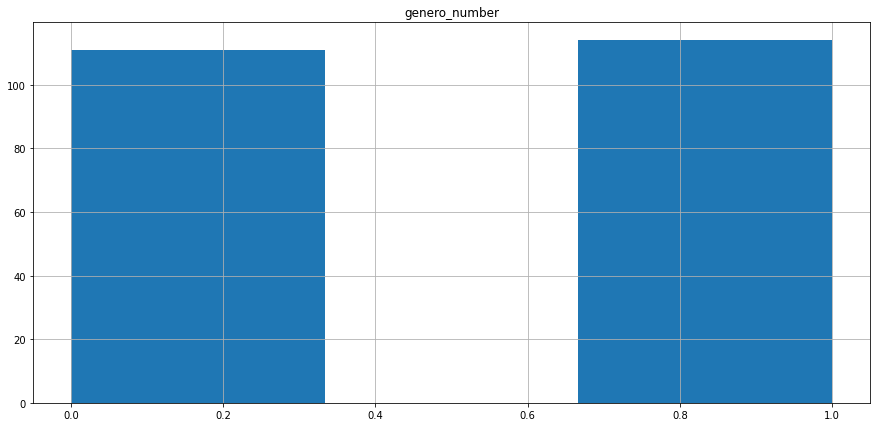

In [36]:
clientes.hist(column='genero_number', figsize=(15,7), bins=3 )

# Junções entre os dados coletados
Nessa etapa vamos realizar o merge entre os dados que realizamos a coleta



In [37]:
estados[:7]

,id_estado,estado,sigla_estado,pais
0,1,Acre,ac,Brasil
1,2,Alagoas,al,Brasil
2,3,Amapá,ap,Brasil
3,4,Amazonas,am,Brasil
4,5,Bahia,ba,Brasil
5,6,Ceará,ce,Brasil
6,7,Distrito Federal,df,Brasil


In [40]:
clientes[:7]

,id_cliente,peso,colesterol,genero,id_estado,genero_number
0,1,102.0,111,Masculino,23,1
1,2,115.0,135,Masculino,7,1
2,3,115.0,136,Masculino,4,1
3,4,140.0,167,Feminino,24,0
4,5,130.0,158,Masculino,26,1
5,6,198.0,227,Masculino,8,1
6,7,114.0,131,Masculino,26,1


In [39]:
clientes_estados = pd.merge(clientes, estados, on='id_estado')
clientes_estados.sort_values('id_cliente')

,id_cliente,peso,colesterol,genero,id_estado,genero_number,estado,sigla_estado,pais
0,1,102.0,111,Masculino,23,1,Roraima,rr,Brasil
9,2,115.0,135,Masculino,7,1,Distrito Federal,df,Brasil
21,3,115.0,136,Masculino,4,1,Amazonas,am,Brasil
32,4,140.0,167,Feminino,24,0,Santa Catarina,sc,Brasil
39,5,130.0,158,Masculino,26,1,Sergipe,se,Brasil
...,...,...,...,...,...,...,...,...,...
167,221,180.0,219,Masculino,20,1,Rio Grande do Norte,rn,Brasil
126,222,116.0,138,Feminino,15,0,Paraíba,pb,Brasil
196,223,144.0,169,Feminino,18,0,Piauí,pi,Brasil
77,224,102.0,116,Masculino,6,1,Ceará,ce,Brasil


In [41]:
#realiza Junção entre clientes e idades
base_completa = pd.merge(clientes_estados, idade, on='id_cliente').sort_values('id_cliente')

In [42]:
base_completa

,id_cliente,peso,colesterol,genero,id_estado,genero_number,estado,sigla_estado,pais,idade
0,1,102.0,111,Masculino,23,1,Roraima,rr,Brasil,17
9,2,115.0,135,Masculino,7,1,Distrito Federal,df,Brasil,28
21,3,115.0,136,Masculino,4,1,Amazonas,am,Brasil,62
32,4,140.0,167,Feminino,24,0,Santa Catarina,sc,Brasil,55
39,5,130.0,158,Masculino,26,1,Sergipe,se,Brasil,44
...,...,...,...,...,...,...,...,...,...,...
167,221,180.0,219,Masculino,20,1,Rio Grande do Norte,rn,Brasil,33
126,222,116.0,138,Feminino,15,0,Paraíba,pb,Brasil,38
196,223,144.0,169,Feminino,18,0,Piauí,pi,Brasil,24
77,224,102.0,116,Masculino,6,1,Ceará,ce,Brasil,31


In [43]:
base_completa.reset_index(drop=True)

,id_cliente,peso,colesterol,genero,id_estado,genero_number,estado,sigla_estado,pais,idade
0,1,102.0,111,Masculino,23,1,Roraima,rr,Brasil,17
1,2,115.0,135,Masculino,7,1,Distrito Federal,df,Brasil,28
2,3,115.0,136,Masculino,4,1,Amazonas,am,Brasil,62
3,4,140.0,167,Feminino,24,0,Santa Catarina,sc,Brasil,55
4,5,130.0,158,Masculino,26,1,Sergipe,se,Brasil,44
...,...,...,...,...,...,...,...,...,...,...
220,221,180.0,219,Masculino,20,1,Rio Grande do Norte,rn,Brasil,33
221,222,116.0,138,Feminino,15,0,Paraíba,pb,Brasil,38
222,223,144.0,169,Feminino,18,0,Piauí,pi,Brasil,24
223,224,102.0,116,Masculino,6,1,Ceará,ce,Brasil,31


# Organizando a base de dados
Podemos realizar várias alterações na base de dados a fim de melhorar o entendimento e disposição das colunas. Além disso, podemos fazer transformações nos textos das linhas e colunas.

In [44]:
# Alterando nome das colunas
base_completa.rename(columns={'id_cliente': 'cod_cliente', 'genero_number': 'cod_genero'}, inplace = True)
base_completa

,cod_cliente,peso,colesterol,genero,id_estado,cod_genero,estado,sigla_estado,pais,idade
0,1,102.0,111,Masculino,23,1,Roraima,rr,Brasil,17
9,2,115.0,135,Masculino,7,1,Distrito Federal,df,Brasil,28
21,3,115.0,136,Masculino,4,1,Amazonas,am,Brasil,62
32,4,140.0,167,Feminino,24,0,Santa Catarina,sc,Brasil,55
39,5,130.0,158,Masculino,26,1,Sergipe,se,Brasil,44
...,...,...,...,...,...,...,...,...,...,...
167,221,180.0,219,Masculino,20,1,Rio Grande do Norte,rn,Brasil,33
126,222,116.0,138,Feminino,15,0,Paraíba,pb,Brasil,38
196,223,144.0,169,Feminino,18,0,Piauí,pi,Brasil,24
77,224,102.0,116,Masculino,6,1,Ceará,ce,Brasil,31


In [45]:
# Alterando as linhas da variável sigla_estado 
base_completa.sigla_estado.str.upper()

0      RR
9      DF
21     AM
32     SC
39     SE
       ..
167    RN
126    PB
196    PI
77     CE
20     DF
Name: sigla_estado, Length: 225, dtype: object

In [46]:
# Inserindo alteração realizada
base_completa['sigla_estado'] = base_completa.sigla_estado.str.upper()

In [47]:
base_completa

,cod_cliente,peso,colesterol,genero,id_estado,cod_genero,estado,sigla_estado,pais,idade
0,1,102.0,111,Masculino,23,1,Roraima,RR,Brasil,17
9,2,115.0,135,Masculino,7,1,Distrito Federal,DF,Brasil,28
21,3,115.0,136,Masculino,4,1,Amazonas,AM,Brasil,62
32,4,140.0,167,Feminino,24,0,Santa Catarina,SC,Brasil,55
39,5,130.0,158,Masculino,26,1,Sergipe,SE,Brasil,44
...,...,...,...,...,...,...,...,...,...,...
167,221,180.0,219,Masculino,20,1,Rio Grande do Norte,RN,Brasil,33
126,222,116.0,138,Feminino,15,0,Paraíba,PB,Brasil,38
196,223,144.0,169,Feminino,18,0,Piauí,PI,Brasil,24
77,224,102.0,116,Masculino,6,1,Ceará,CE,Brasil,31


# Alterando disposição das colunas do arquivo de dados
Vamos alterar as disposições das colunas no nosso conjunto de dados a fim de faciliar a visuliazação.

In [48]:
base_completa[['cod_cliente', 'genero', 'idade', 'peso', 'colesterol' ,'id_estado', 'estado', 'sigla_estado', 'pais' ]]

,cod_cliente,genero,idade,peso,colesterol,id_estado,estado,sigla_estado,pais
0,1,Masculino,17,102.0,111,23,Roraima,RR,Brasil
9,2,Masculino,28,115.0,135,7,Distrito Federal,DF,Brasil
21,3,Masculino,62,115.0,136,4,Amazonas,AM,Brasil
32,4,Feminino,55,140.0,167,24,Santa Catarina,SC,Brasil
39,5,Masculino,44,130.0,158,26,Sergipe,SE,Brasil
...,...,...,...,...,...,...,...,...,...
167,221,Masculino,33,180.0,219,20,Rio Grande do Norte,RN,Brasil
126,222,Feminino,38,116.0,138,15,Paraíba,PB,Brasil
196,223,Feminino,24,144.0,169,18,Piauí,PI,Brasil
77,224,Masculino,31,102.0,116,6,Ceará,CE,Brasil


In [49]:
base_completa = base_completa[['cod_cliente','genero', 'idade', 'peso', 'colesterol' ,'id_estado', 'estado', 'sigla_estado', 'pais' ]].reset_index(drop=True)

In [50]:
base_completa

,cod_cliente,genero,idade,peso,colesterol,id_estado,estado,sigla_estado,pais
0,1,Masculino,17,102.0,111,23,Roraima,RR,Brasil
1,2,Masculino,28,115.0,135,7,Distrito Federal,DF,Brasil
2,3,Masculino,62,115.0,136,4,Amazonas,AM,Brasil
3,4,Feminino,55,140.0,167,24,Santa Catarina,SC,Brasil
4,5,Masculino,44,130.0,158,26,Sergipe,SE,Brasil
...,...,...,...,...,...,...,...,...,...
220,221,Masculino,33,180.0,219,20,Rio Grande do Norte,RN,Brasil
221,222,Feminino,38,116.0,138,15,Paraíba,PB,Brasil
222,223,Feminino,24,144.0,169,18,Piauí,PI,Brasil
223,224,Masculino,31,102.0,116,6,Ceará,CE,Brasil


# Análise de dados
É a etapa onde selecionamos os algoritmos de Machine Learning que serão inseridos para alcançar o resultado, levando em consideração o conjunto de dados obtidos na etapa anterior.

Para esse trabalho, vamos realizar um agrupamento de pessoas baseado no colestesterol, peso e idade das pessoas.

#Aplicando método do cotovelo
Vamos iniciar visualizando identificando o número de clusters necessário para realizar o agrupamento

In [51]:
from sklearn.cluster import KMeans

In [52]:
def calcular_wcss(dados_cliente):
    wcss = []
    for k in range(1,11):
        kmeans = KMeans(n_clusters = k, random_state=0)
        kmeans.fit(X=dados_cliente)        
        wcss.append(kmeans.inertia_)
    return wcss

In [53]:
dados_cliente = base_completa[['peso', 'colesterol','idade']]
dados_cliente.head()

,peso,colesterol,idade
0,102.0,111,17
1,115.0,135,28
2,115.0,136,62
3,140.0,167,55
4,130.0,158,44


In [54]:
wcss_clientes = calcular_wcss(dados_cliente)

In [55]:
type(wcss_clientes)

list

In [56]:
# Visualizando os dados obtidos do WCSS
for i in range(len(wcss_clientes)):
  print(f'O cluster {i} possui valor de WCSS de: {wcss_clientes[i]}')

O cluster 0 possui valor de WCSS de: 615755.6435484447
O cluster 1 possui valor de WCSS de: 189212.54409773235
O cluster 2 possui valor de WCSS de: 110985.62659521378
O cluster 3 possui valor de WCSS de: 85993.49644839708
O cluster 4 possui valor de WCSS de: 72765.0926995486
O cluster 5 possui valor de WCSS de: 60402.61567119764
O cluster 6 possui valor de WCSS de: 49363.864657354534
O cluster 7 possui valor de WCSS de: 42246.69687529805
O cluster 8 possui valor de WCSS de: 36793.297727438636
O cluster 9 possui valor de WCSS de: 31628.83439189302


# Visualizando o gráfico do cotovelo

In [57]:
import plotly.express as px  #Criação de graficos dinâmnicos
import plotly.offline as py
import plotly.graph_objects as go #Para criação e concatenização de graficos

In [58]:
grafico_wcss = px.line( x= range(1,11),
                        y=wcss_clientes
                       )
fig = go.Figure(grafico_wcss)

fig.update_layout(title='Calculando o WCSS',
                  xaxis_title= 'Número de clusters',
                  yaxis_title= 'Valor do Wcss', 
                  template =  'plotly_white'
                  ) 

fig.show()



In [59]:
kmeans_clientes = KMeans(n_clusters=3, random_state=0)
base_completa['cluster'] = kmeans_clientes.fit_predict(dados_cliente)

In [60]:
base_completa

,cod_cliente,genero,idade,peso,colesterol,id_estado,estado,sigla_estado,pais,cluster
0,1,Masculino,17,102.0,111,23,Roraima,RR,Brasil,1
1,2,Masculino,28,115.0,135,7,Distrito Federal,DF,Brasil,1
2,3,Masculino,62,115.0,136,4,Amazonas,AM,Brasil,1
3,4,Feminino,55,140.0,167,24,Santa Catarina,SC,Brasil,2
4,5,Masculino,44,130.0,158,26,Sergipe,SE,Brasil,2
...,...,...,...,...,...,...,...,...,...,...
220,221,Masculino,33,180.0,219,20,Rio Grande do Norte,RN,Brasil,0
221,222,Feminino,38,116.0,138,15,Paraíba,PB,Brasil,1
222,223,Feminino,24,144.0,169,18,Piauí,PI,Brasil,2
223,224,Masculino,31,102.0,116,6,Ceará,CE,Brasil,1


# Calcula os centroides de cada cluster

In [61]:
centroides_clusters = kmeans_clientes.cluster_centers_
centroides_clusters

array([[181.88235294, 216.33823529,  44.54411765],
       [109.79268293, 125.15853659,  42.63414634],
       [141.99946667, 173.21333333,  41.89333333]])

In [62]:
dados_cliente

,peso,colesterol,idade
0,102.0,111,17
1,115.0,135,28
2,115.0,136,62
3,140.0,167,55
4,130.0,158,44
...,...,...,...
220,180.0,219,33
221,116.0,138,38
222,144.0,169,24
223,102.0,116,31


Aqui temos os centroides dos 3 cluster de acordo com os atributos. 
Nesse exemplo vemos os centroides de 'peso', 'colesterol','idade' respectivamente.

In [64]:
grafico = px.scatter(x = base_completa['peso'], 
                            y = base_completa['colesterol'], 
                            color= base_completa['cluster'])

grafico_centroide = px.scatter(x = centroides_clusters[:,0], y = centroides_clusters[:,1], size = [7,7,7])
grafico_final_cluster = go.Figure(data = grafico.data + grafico_centroide.data)
grafico_final_cluster.show()

# Visualizando e alterando layout do gráfico

In [65]:
grafico = px.scatter(x = base_completa['colesterol'], 
                     y = base_completa['peso'], 
                     color= base_completa['cluster'])
fig = go.Figure(grafico)

fig.update_layout(title='Análise de Clusters',
                  xaxis_title= 'Colesterol',
                  yaxis_title= 'peso',                  
                  ) 


fig.show()

# Criando Função para Gerar gráficos

In [66]:
def plotar_grafico(x,y, xlabel, y_label):
  grafico = px.scatter(x = x, 
                      y = y, 
                      color= base_completa['cluster'])
  
  fig = go.Figure(grafico)

  fig.update_layout(title='Análise de Clusters',
                    xaxis_title= xlabel,
                    yaxis_title= y_label,                  
                    ) 

  fig.show()

In [67]:
plotar_grafico(base_completa['colesterol'], base_completa['peso'], 'colesterol', 'peso')

In [68]:
plotar_grafico(base_completa['peso'], base_completa['colesterol'], 'peso', 'colesterol')

In [69]:
plotar_grafico(base_completa['idade'], base_completa['colesterol'], 'idade', 'colesterol')

# Segmentando os clientes baseado na análise dos clusters

Agora vamos analisar os dados dos clusters referente aos atributos peso e colesterol e atribuir nomes que representam aquele agrupamento.

Vamos agrupar  em 3 tipos:


Alto risco: Peso e colesterol altos

Baixo risco: Baixo peso e colesterol baixo

Moderado risco: peso e colesterol medianos




In [70]:
x = 'colesterol'
y = 'peso'

plotar_grafico(base_completa[x], base_completa[y], x, y)


In [71]:
cluster_clientes = base_completa

In [72]:
# Seguimentando os clientes baseado na análise dos clusters
cluster_clientes.loc[cluster_clientes['cluster']==2,'nome_cluster'] = 'Alto Risco'
cluster_clientes.loc[cluster_clientes['cluster']==1,'nome_cluster'] = 'Baixo Risco'
cluster_clientes.loc[cluster_clientes['cluster']==0,'nome_cluster'] = 'Risco Moderado'

In [73]:
cluster_clientes

,cod_cliente,genero,idade,peso,colesterol,id_estado,estado,sigla_estado,pais,cluster,nome_cluster
0,1,Masculino,17,102.0,111,23,Roraima,RR,Brasil,1,Baixo Risco
1,2,Masculino,28,115.0,135,7,Distrito Federal,DF,Brasil,1,Baixo Risco
2,3,Masculino,62,115.0,136,4,Amazonas,AM,Brasil,1,Baixo Risco
3,4,Feminino,55,140.0,167,24,Santa Catarina,SC,Brasil,2,Alto Risco
4,5,Masculino,44,130.0,158,26,Sergipe,SE,Brasil,2,Alto Risco
...,...,...,...,...,...,...,...,...,...,...,...
220,221,Masculino,33,180.0,219,20,Rio Grande do Norte,RN,Brasil,0,Risco Moderado
221,222,Feminino,38,116.0,138,15,Paraíba,PB,Brasil,1,Baixo Risco
222,223,Feminino,24,144.0,169,18,Piauí,PI,Brasil,2,Alto Risco
223,224,Masculino,31,102.0,116,6,Ceará,CE,Brasil,1,Baixo Risco


# Análises dos clusters criados

In [74]:
# Verifica os valores de idade por cluster
cluster_clientes.groupby('nome_cluster')['idade'].describe()

,count,mean,std,min,25%,50%,75%,max
nome_cluster,,,,,,,,
Alto Risco,75.0,41.893333,14.699304,16.0,30.50,42.0,53.00,70.0
Baixo Risco,82.0,42.634146,15.442056,17.0,29.00,42.5,54.75,70.0
Risco Moderado,68.0,44.544118,15.977067,16.0,31.75,47.0,58.50,69.0


In [78]:
# Verifica os valores de estado por cluster
cluster_clientes.groupby('nome_cluster')['estado'].describe()

,count,unique,top,freq
nome_cluster,,,,
Alto Risco,75,26,Roraima,5
Baixo Risco,82,26,Amazonas,8
Risco Moderado,68,24,Distrito Federal,6


In [84]:
cluster_clientes.query('nome_cluster == "Alto Risco" & estado == "Mato Grosso"')

,cod_cliente,genero,idade,peso,colesterol,id_estado,estado,sigla_estado,pais,cluster,nome_cluster
23,24,Feminino,34,140.0,168,11,Mato Grosso,MT,Brasil,2,Alto Risco
69,70,Feminino,49,137.0,166,11,Mato Grosso,MT,Brasil,2,Alto Risco


In [85]:
cluster_clientes.groupby(['nome_cluster', 'genero'])['peso'].describe()

count        mean        std    min     25%     50%  \
nome_cluster   genero                                                           
Alto Risco     Feminino    44.0  142.825455  10.115751  124.0  134.75  142.00   
               Masculino   31.0  140.827097  10.087216  124.0  130.50  142.32   
Baixo Risco    Feminino    39.0  111.153846   8.692218   96.0  106.00  112.00   
               Masculino   43.0  108.558140   8.511343   95.0  102.00  106.00   
Risco Moderado Feminino    28.0  183.571429  10.318730  161.0  178.00  185.00   
               Masculino   40.0  180.700000  11.688697  159.0  172.50  179.00   

                             75%    max  
nome_cluster   genero                    
Alto Risco     Feminino   153.25  158.0  
               Masculino  149.50  157.0  
Baixo Risco    Feminino   118.00  126.0  
               Masculino  115.50  124.0  
Risco Moderado Feminino   191.00  203.0  
               Masculino  187.25  203.0

# Exportando dados 

In [83]:
cluster_clientes.to_csv('classificacao_clientes.csv', sep = ';', encoding='latin1') 